# Before Starting:
**If you liked this kernel please don't forget to upvote and comment the project, this will keep me motivated to other kernels in the future. I hope you enjoy my  exploration into this dataset. Let's begin!**

In [ ]:
from IPython.display import display, Image

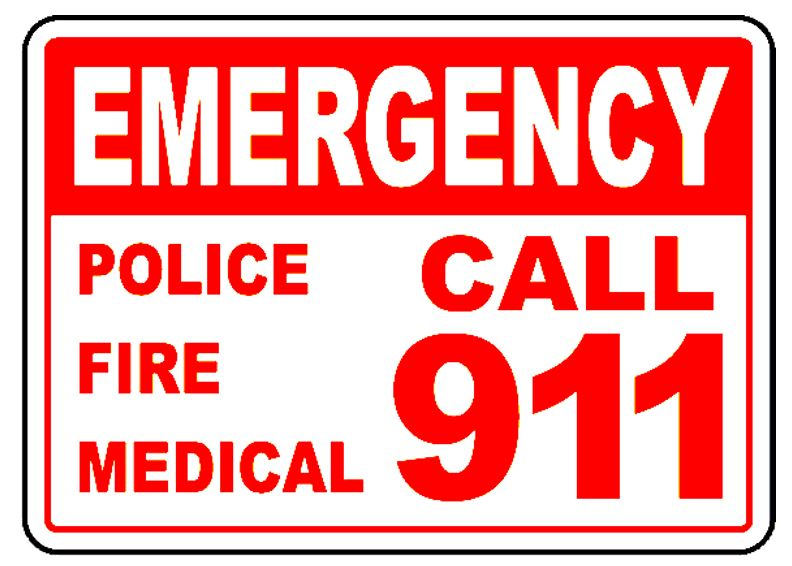

Hello eveyone. This is my first kernel on kaggle and looking for your feedback and support.Love to discuss and share ideas with you.
Let's get started.

My roadmap

1.Basic description of DataSet

2.Creating New Features

3.Data visualization and Analysis

4.Visualising linear relationship for calls 

5.Emergency associated with the call

6.Heat Maps

7.Conclusion



# 1.Basic description of DataSet

In [ ]:
# Import numpy and pandas

import numpy as np 
import pandas as pd 

# Import data visualization libraries.
import matplotlib.pyplot as plt 
import seaborn as sns 
 
sns.set(style= "whitegrid")


In [ ]:
# Read in the csv file as a dataframe called calls
calls = pd.read_csv("../input/911.csv")

In [ ]:
# Quick look to data
calls.head(5)

In [ ]:
# columns with objects are not numbers but they are string types.
calls.info()

In [ ]:
calls['timeStamp'][0]

In [ ]:
#focus on timeStamp variable. It is a string not a datetime object.
#I Used pd.to_datetime to convert the column from strings to DateTime objects.
#In order to fix that,
calls['timeStamp']=pd.to_datetime(calls['timeStamp'])

In [ ]:
# Now you can see timeStamp is not a string anymore. This will help to analyze easier than before and it's make more sense now.
calls.info()

# 2.Creating New Features

In [ ]:
# Before move into big picture let me simplify the title and the timeStamp columns much more detailed.
# In order to do that i'm going to create new columns for seperating title column into 'EMS','FIRE',and 'Traffic'.
# Also the timeStamp column into 'Year','Month','Day of Week' and 'Hour'
calls['Reason']=calls['title'].apply(lambda title:title.split(':')[0])


In [ ]:
calls['Reason'].value_counts()

In [ ]:
calls['year']=calls['timeStamp'].apply(lambda time:time.year)
calls['Month']=calls['timeStamp'].apply(lambda title:title.month)
calls['Day of Week']=calls['timeStamp'].apply(lambda title:title.dayofweek)
calls['Hour']=calls['timeStamp'].apply(lambda title:title.hour)

In [ ]:
calls.head(5)
# Now this table gives us much more detailed description about the timeStamp variable.

# 3.Data visualization and Analysis

In [ ]:
sns.countplot(x='Reason',data=calls,palette='bright')
plt.title('Counts for all Reason')

We can see that the EMS is the major reason for a 911 call followed by Traffic accidents

In [ ]:
calls['Day of Week'].unique()

In [ ]:
# Notice that Day of Week is an integer 0 to 6. I used map() function with below dictionary to map the real names to the Day of Week
dow={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
calls['Day of Week']=calls['Day of Week'].map(dow)

In [ ]:
sns.countplot(x='Day of Week',data=calls,hue='Reason',palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Call Reasons by Day of Week')

We can see the number of calls for EMS and Fire are almost same for everyday but calls for a Traffic shows low count for weekends. Because there are not heavy traffic during weekends,maybe most of the people stay at home.  

In [ ]:
sns.countplot(x='year',data=calls,hue='Reason',palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Call Reasons by Year')

As you can see year 2015 recorded as the lowest number of calls for any reason and calls due to EMS is the top reason for every year.

In [ ]:
plt.figure(figsize = (14,7))
sns.set_context("paper", font_scale=2)
sns.countplot(x='Month',data=calls,hue='Reason',palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Call Reasons by Month')

We can see from the visualizations above that the number of 911 calls drop during month 11(November). 

# 4.Visualising linear relationship for calls 

In [ ]:
byYear=calls.groupby('year').count()
byYear.head(5)

In [ ]:
plt.figure(figsize=(14,5))
byYear['twp'].plot()
plt.title('linear relationship for calls per Year')

Lowest number of calls recorded in year 2015 and number calls stricly increased to beginning of year 2016. After that number calls gradually decreasing until year 2018.

In [ ]:
byMonth=calls.groupby('Month').count()
byMonth.head(5)

In [ ]:
plt.figure(figsize=(14,5))
byMonth['twp'].plot()
plt.title('linear relationship for calls per Month')

As you can see there are some significant spikes in January,March and October but we get some downturn in Novembers.

In [ ]:
byDayOfWeek=calls.groupby('Day of Week').count()
byDayOfWeek.head(5)

In [ ]:
plt.figure(figsize=(14,5))
byDayOfWeek['twp'].plot()
plt.title('linear relationship for calls per Day Of Week')

There is a significant bottom out spike in sundays.

# 5.Emergency associated with the call

In [ ]:
calls['twp'].value_counts().head(10).plot.bar(color = 'blue')
plt.xlabel('Townships', labelpad = 20)
plt.ylabel('Number of Calls')
plt.title('Townships with Most 911 Calls')

Highest number of emergency calls reported in Lower Merion and followed by others.

In [ ]:
calls['Emergency'] = calls['title'].apply(lambda x: x.split(':')[1])
calls['Emergency'].value_counts().head(10)

In [ ]:
#Visualization of top 10 911 Calls
calls['Emergency'].value_counts().head(10).plot.bar(color = 'red')
plt.xlabel('Emergency',labelpad = 20)
plt.ylabel('Number of 911 Calls')
plt.title('Top 10 Emergency Description Calls')

Most number of 911 emergency calls due to vehicle accidents and lowest due to Head injuries.

In [ ]:
# Create a new column called 'Date' that contains the date from the timeStamp column. 

In [ ]:
calls['Date']=calls['timeStamp'].apply(lambda t:t.date())


In [ ]:
# Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

In [ ]:
plt.figure(figsize=(18,7))
calls.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Notice here it is looks like there are some significant spikes in March, 2018 may be late November,2018.

In [ ]:
# Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

In [ ]:
plt.figure(figsize=(18,7))
calls[calls['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic Calls')
plt.tight_layout()

As you can see there are some significant spikes in Traffic calls in March and November 2018 and little bit in February 2016. Most of the number of Traffic calls vary between 0-400.

In [ ]:
plt.figure(figsize=(18,7))
calls[calls['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire Calls')
plt.tight_layout()

It seem to be there is some significant spikes in fire calls in March 2018 and little bit in between January and May 2016, maybe late august in 2016 and also the late may in 2017. Rest of the numbers of calls vary between 0-200.

In [ ]:
plt.figure(figsize=(18,7))
calls[calls['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Notice that most of the number of EMS calls vary between 50-300. There are some significant spikes in March 2018 and late August in 2018. Then we get some downturns or some bottom out spikes in May 2016 and early may in 2017.

# 6.Heat Maps

In [ ]:
dayYear = calls.groupby(by=['Day of Week','year']).count()['Reason'].unstack()
dayYear.head()

In [ ]:
#Now create a HeatMap using this new DataFrame.
plt.figure(figsize=(12,6))
sns.heatmap(dayYear,cmap='coolwarm',linewidths=.5)

We can see that the lowest number of calls reported in year 2015 and for evey year Sunday indicates the lowest number of calls for any reason.

In [ ]:
dayMonth = calls.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

In [ ]:
#Now create a HeatMap using this new DataFrame.
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis',linewidths=.5)

Highest number of calls for any reason recorded in March(Fridays). This is already confirmed by above three seperate line charts.


In [ ]:
dayHour = calls.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

In [ ]:
#Now create a HeatMap using this new DataFrame.
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='YlGnBu',linewidths=.5)

Majority of lowest number of calls reported in between 0-7 (Early Morning) hour and Highest number of calls reported in Middays.

# 7. Conclusion

1.   So let me summarize all our results. Throughout this journey, first we understood some basic information about our dataset.Then i created some extra features to understand our dataset more cleary by seperating columns. I hope it helps all of us to get some sense about the complex columns.
2. When we see our results on seperated plots we can understand,

   Major reason for 911 calls- EMS
   
   Most calm year for 911 calls-2015
   
   Busy months for 911 calls-January,March,October
   
   Most calm weekday for 911 calls -Sunday
   
   Most calm hours for 911 calls-0 to 7
   
   Busy township for 911 calls- Lower Merion
   
   Top 911 emergency calls due to - Vahicle accidents.
   
3. According to this information. we can identify the major reason for emegency calls and what time period and which area most incidents occur in Pennsylvania. 
   

# leave any comment or feedback. 
 ## Thanks!